# Create dataset

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [114]:
from sklearn import set_config
set_config(display='diagram')

In [115]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=41,
    hypercube=False,
    class_sep=10
)

In [116]:
X.shape

(100, 2)

In [117]:
y.shape

(100,)

In [118]:
# draw the points how our data looks like
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', marker='+', s=50)
plt.show()

<IPython.core.display.Javascript object>

In [119]:
X.shape[0]

100

# Make a perceptron  

In [120]:
def step_function(z):
    return 1 if z >  0 else 0


def perceptron(X, y):
    
    # initialization
    X = np.insert(X, 0, 1, axis=1)
    w = np.ones(X.shape[1]) # weights
    lr = 0.1 # learning rate
    
   
    for i in range(1000):
        # select a random number within no of column present in dataset
        idx = np.random.randint((X.shape[0])) 
        y_hat = step_function(np.dot(X[idx], w))
        w = w + lr*(y[idx] - y_hat) * X[idx]
        
    return w[0], w[1:]

In [121]:
y.shape

(100,)

In [122]:
intercept_, coef_ = perceptron(X, y)
print(coef_, intercept_)

[1.30006305 0.20034555] 1.0


In [123]:
coef_[1]

np.float64(0.2003455507469622)

In [124]:
m1 = -(coef_[0]/ coef_[1])
b1 = -(intercept_/ coef_[1])
print(m1, b1)

-6.489103657050624 -4.9913761312473905


In [125]:
x_in = np.linspace(-3, 3, 100)
y_in = m1*x_in + b1

In [126]:
plt.figure(figsize=(10, 7))

plt.plot(x_in, y_in, 'r', linewidth=2) # our prediction line
plt.scatter(X[:, 0], X[:, 1], c=y, marker='.', cmap='winter', s=200)

plt.ylim(-3, 2)
plt.title("Predicted line from perceptron method")
plt.show()

<IPython.core.display.Javascript object>

In [127]:
def perceptron_new(X, y):
    """Here we calculate the m and b using perceptron method."""
    
    m = []
    b = []
    
    X = np.insert(X, 0, 1, axis=1)
    w = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range((X.shape[0])):
        idx = np.random.randint(X.shape[0])
        y_hat = step_function(np.dot(X[idx], w))
        w += lr * (y[idx] - y_hat) * X[idx]
        
    m.append(-w[1]/w[2])
    b.append(-(w[0]/w[2]))
    
    return m, b

In [128]:
m, b = perceptron_new(X,y)
print(m, b)

[np.float64(-13.244167576697293)] [np.float64(-9.702498590327073)]


# Apply the Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X, y)

LogisticRegression()

In [130]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [131]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_in + b

In [138]:
%matplotlib inline

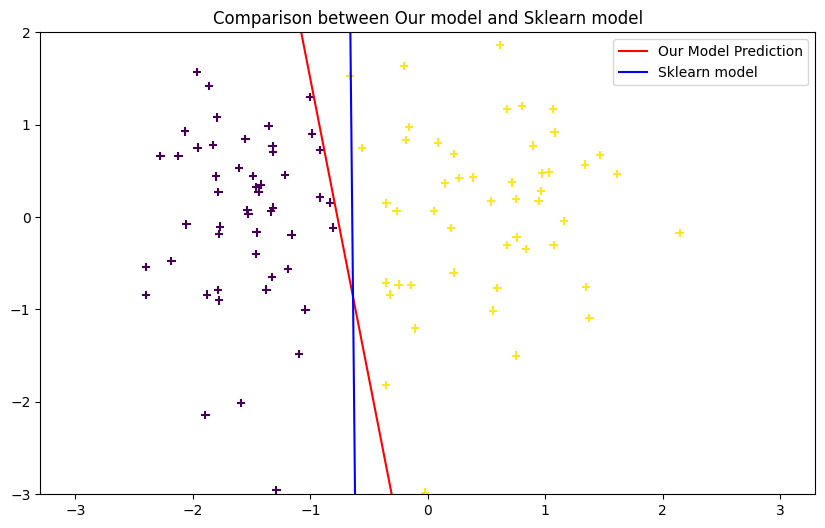

In [163]:
plt.figure(figsize=(10, 6)), 
plt.plot(x_in, y_in, 'r', label='Our Model Prediction')
plt.scatter(X[:, 0], X[:, 1], c=y, marker= '+') # data points
plt.plot(x_input1, y_input1, 'b', label='Sklearn model')

plt.ylim(-3, 2)
plt.title("Comparison between Our model and Sklearn model")
plt.legend()
plt.show()